# Changing Dataset Location

In [11]:
import os

# Change this to your actual folder path
os.chdir('/Users/PiyushJha')

print("Now working in:", os.getcwd())

Now working in: /Users/PiyushJha


In [13]:

%pwd 

'/Users/PiyushJha'

# Volvo-Eicher Commerical Vehicles Sales Data Visualization

# Heat Map

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("DATASET OF VECV.xlsx", sheet_name="Sheet1")
df


,Segment,May'25,May'24,Growth % (May),Jun'25,Jun'24,Growth % (Jun),YTD FY26,YTD FY25,Growth % (YTD)
0,Total Eicher Trucks and Buses (Incl. EVs),7258,6719,8.0%,7198,7314,-1.6%,21173,19287,9.8%
1,SCV/ LMD Trucks < 18.5T,3236,2809,15.2%,3166,3101,2.1%,9152,8174,12.0%
2,HD (≥18.5T),1502,1635,-8.1%,1759,1791,-1.8%,4580,4689,-2.3%
3,LMD Bus,1882,1718,9.5%,1617,1870,-13.5%,5527,4841,14.2%
4,HD Bus,138,142,-2.8%,180,131,37.4%,478,391,22.3%
5,Total Domestic,6758,6304,7.2%,6722,6893,-2.5%,19737,18095,9.1%
6,LMD Exports,289,267,8.2%,340,291,16.8%,927,695,33.4%
7,HD Exports,93,15,520.0%,19,62,-69.4%,150,102,47.1%
8,Bus Exports,119,133,-10.5%,117,68,72.1%,359,395,-9.1%
9,Total Exports,501,415,20.7%,476,421,13.1%,1436,1192,20.5%


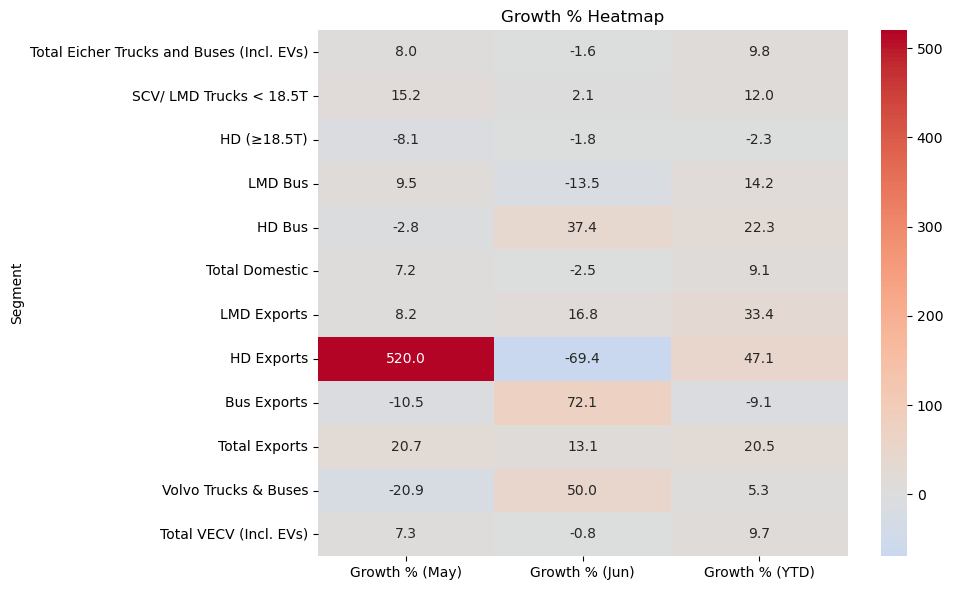

In [3]:
# Clean growth % columns
df["Growth % (May)"] = df["Growth % (May)"].astype(str).str.replace('%', '').astype(float)
df["Growth % (Jun)"] = df["Growth % (Jun)"].astype(str).str.replace('%', '').astype(float)
df["Growth % (YTD)"] = df["Growth % (YTD)"].astype(str).str.replace('%', '').astype(float)


# Create a new DataFrame for heatmap
df1 = df[["Segment", "Growth % (May)", "Growth % (Jun)", "Growth % (YTD)"]]
df1.set_index("Segment", inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1, annot=True,fmt=".1f", cmap="coolwarm", center=0)
plt.title("Growth % Heatmap")
plt.tight_layout()
plt.show()

# Plot 1: May Sales Comparison

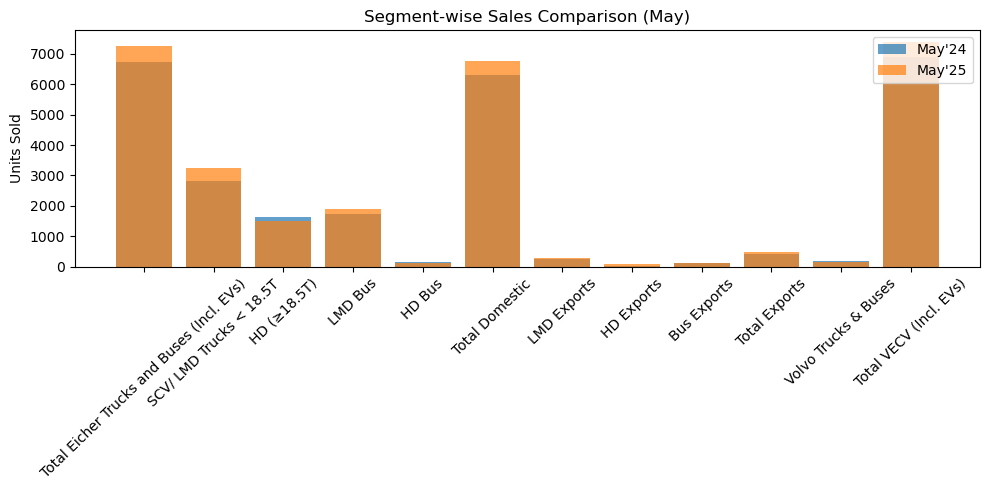

In [4]:
plt.figure(figsize=(10, 5))
plt.bar(df["Segment"], df["May'24"], label="May'24", alpha=0.7)
plt.bar(df["Segment"], df["May'25"], label="May'25", alpha=0.7)
plt.title("Segment-wise Sales Comparison (May)")
plt.ylabel("Units Sold")
plt.xticks(rotation=44)
plt.legend()
plt.tight_layout()
plt.show()



# Plot 2: June Sales Comparison

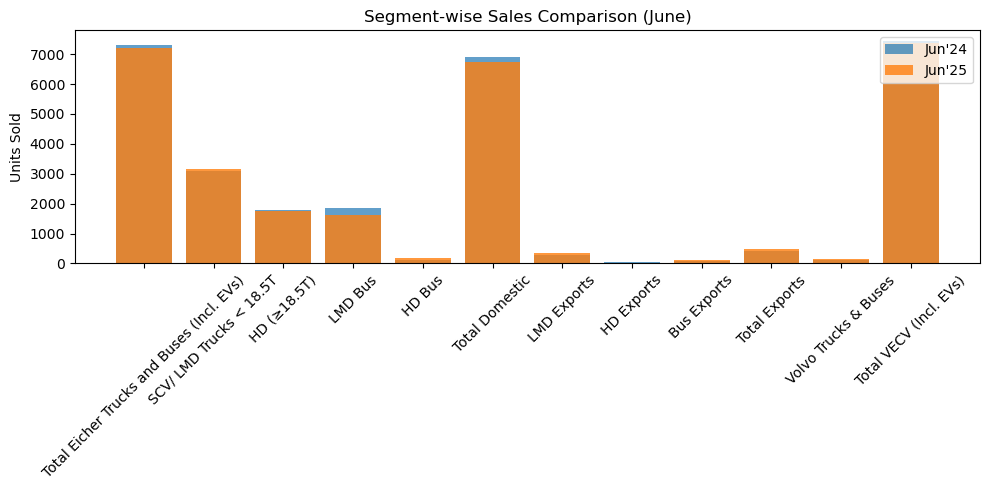

In [5]:
plt.figure(figsize=(10, 5))
plt.bar(df["Segment"], df["Jun'24"], label="Jun'24", alpha=0.7)
plt.bar(df["Segment"], df["Jun'25"], label="Jun'25", alpha=0.8)
plt.title("Segment-wise Sales Comparison (June)")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Categorical Plot

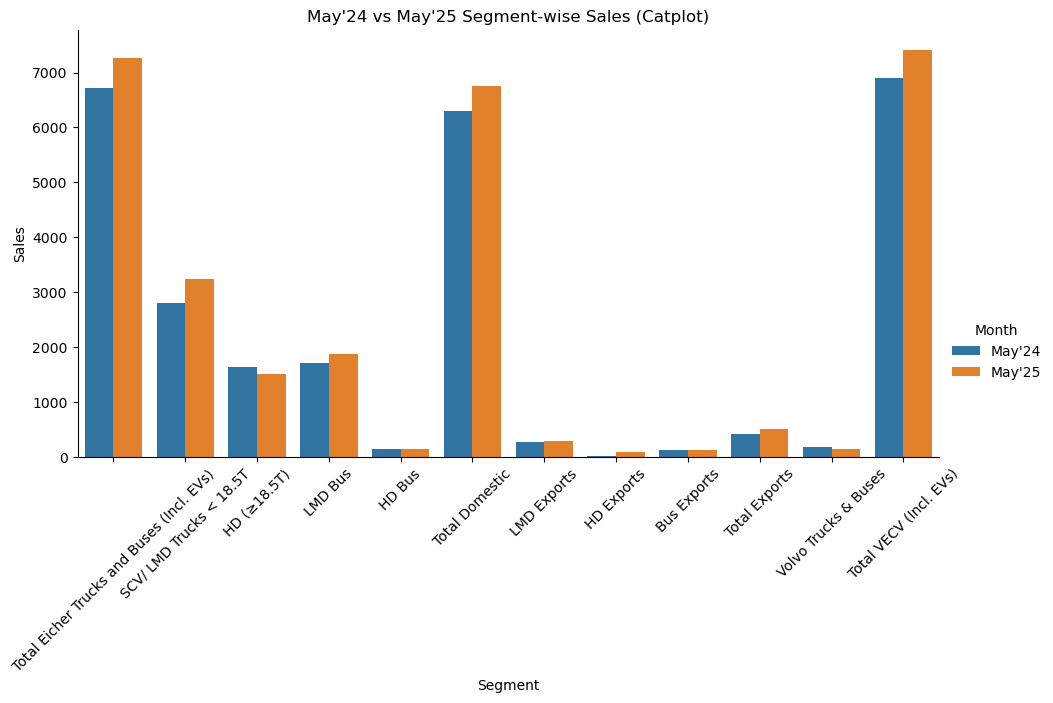

In [6]:
df2 = pd.melt(df,
                    id_vars=["Segment"],
                    value_vars=["May'24", "May'25"],
                    var_name="Month",
                    value_name="Sales")

# Plot
g = sns.catplot(data=df2,
                x="Segment", y="Sales", hue="Month",
                kind="bar", height=5, aspect=2)

g.set_xticklabels(rotation=45)
plt.title("May'24 vs May'25 Segment-wise Sales (Catplot)")

plt.show()

# Pie Chart-showing each segment's share in total growth

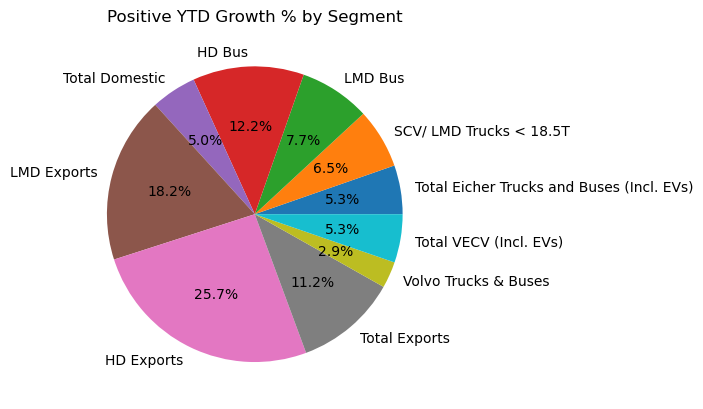

In [7]:
df["Growth % (YTD)"] = df["Growth % (YTD)"].astype(str).str.replace('%', '').astype(float)

# ✅ Sirf positive values wale rows lo
df_pos = df[df["Growth % (YTD)"] > 0]

# Simple pie chart
plt.pie(df_pos["Growth % (YTD)"], labels=df_pos["Segment"], autopct="%1.1f%%")
plt.title("Positive YTD Growth % by Segment")
plt.show()

# Stacked Chart-showing each segment's share in total growth

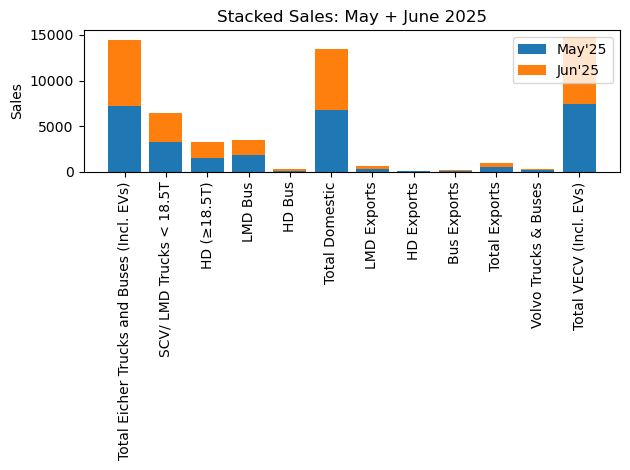

In [8]:
plt.bar(df["Segment"], df["May'25"], label="May'25")
plt.bar(df["Segment"], df["Jun'25"], bottom=df["May'25"], label="Jun'25")

plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.title("Stacked Sales: May + June 2025")
plt.legend()
plt.tight_layout()
plt.show()

# Identify high-sales but low-growth segments

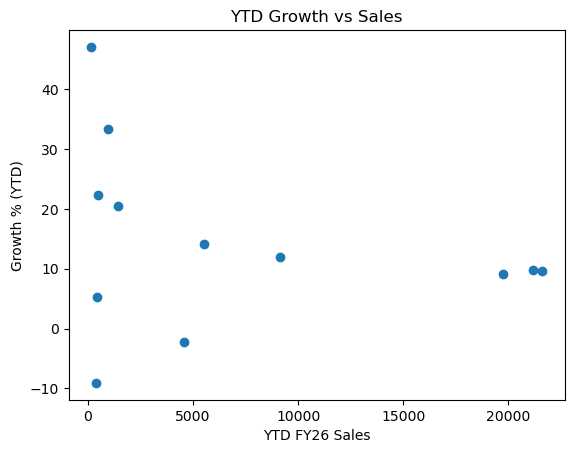

In [9]:
df["Growth % (YTD)"] = df["Growth % (YTD)"].astype(str).str.replace('%', '').astype(float)

plt.scatter(df["YTD FY26"], df["Growth % (YTD)"])
plt.xlabel("YTD FY26 Sales")
plt.ylabel("Growth % (YTD)")
plt.title("YTD Growth vs Sales")
plt.show()


# Month-on-Month Growth Rate Bar-See which segment is growing Month on Month

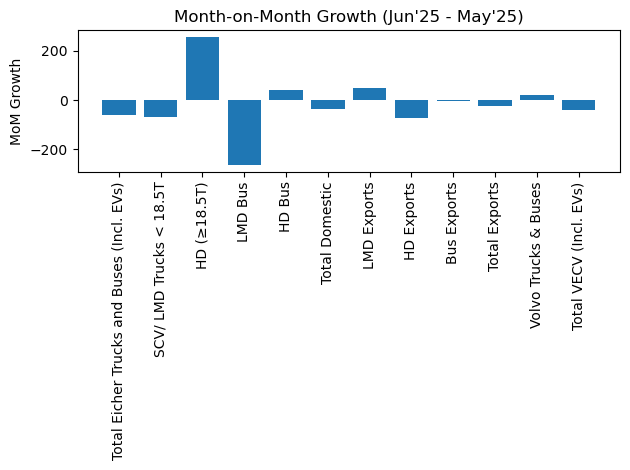

In [10]:
df["MoM Growth"] = df["Jun'25"] - df["May'25"]

plt.bar(df["Segment"], df["MoM Growth"])
plt.xticks(rotation=90)
plt.ylabel("MoM Growth")
plt.title("Month-on-Month Growth (Jun'25 - May'25)")
plt.tight_layout()
plt.show()